# Problem 19.9 -- Simpson's Paradox

This problem illustrates the calculation of Probability Density Function (PDF) of time series and the calculation of statistical moments of the distributions and their more suitable equivalences.

Import essential packages

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.signal as sig
import pandas as pan

Read data from files (You have to look in the file to identify which row you should import).

In [13]:
x=pan.read_csv("data/SimpsonsData.csv",delimiter=',')

In [15]:
shape = x.shape
print(shape)

(1599, 3)


In [16]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   0.3935068192461566  1599 non-null   float64
 1   0.9662125667400799  1599 non-null   float64
 2   DT                  1599 non-null   object 
dtypes: float64(2), object(1)
memory usage: 37.6+ KB


In [17]:
x.columns = ['room', 'price','cat']

In [18]:
print(x[0:5])

       room     price cat
0  0.199263  0.921649  DT
1  0.138670  0.680298  DT
2  0.204109  0.806131  DT
3  0.236026  0.746147  DT
4  0.024894  0.568459  DT


In [20]:
xdt = x[x.cat=='DT']
print(xdt.size)

1197


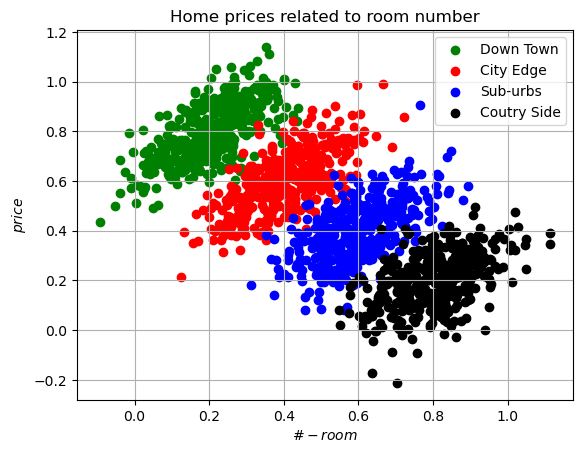

In [43]:
plt.scatter(x.room[x.cat=='DT'], x.price[x.cat=='DT'],c='green',label='Down Town')
plt.scatter(x.room[x.cat=='CE'], x.price[x.cat=='CE'],c='red',label='City Edge')
plt.scatter(x.room[x.cat=='SU'], x.price[x.cat=='SU'],c='blue',label='Sub-urbs')
plt.scatter(x.room[x.cat=='CS'], x.price[x.cat=='CS'],c='black',label='Coutry Side')
plt.xlabel('$\#-room$')
plt.ylabel('$price$')
plt.grid(True)
plt.legend()
plt.title('Home prices related to room number')
plt.show()

In [66]:
mdtf = np.polyfit(x.room,x.price,1, cov=True)
print(mdtf)

(array([-0.71213044,  0.85437823]), array([[ 0.00034595, -0.00017298],
       [-0.00017298,  0.00010709]]))


In [77]:
mdtf = np.polyfit(x.room,x.price,1,cov=True)
af = mdtf[0][0]
bf = mdtf[0][1]
r = mdtf[1][0,1]/(np.sqrt(mdtf[1][0,0]*mdtf[1][1,1]))
print(r'$a x + b =$ {:.3f} $x$ + {:.3f}, with correlation coefficient r = {:.3f}'.format(af,bf,r) )

$a x + b =$ -0.712 $x$ + 0.854, with correlation coefficient r = -0.899


In [75]:
md1 = np.polyfit(x.room[x.cat=='DT'],x.price[x.cat=='DT'],1, cov=True)
af1 = md1[0][0]
bf1 = md1[0][1]
r1 = md1[1][0,1]/(np.sqrt(md1[1][0,0]*md1[1][1,1]))
md2 = np.polyfit(x.room[x.cat=='CE'],x.price[x.cat=='CE'],1, cov=True)
af2 = md2[0][0]
bf2 = md2[0][1]
r2 = md2[1][0,1]/(np.sqrt(md2[1][0,0]*md2[1][1,1]))
md3 = np.polyfit(x.room[x.cat=='SU'],x.price[x.cat=='SU'],1, cov=True)
af3 = md3[0][0]
bf3 = md3[0][1]
r3 = md3[1][0,1]/(np.sqrt(md3[1][0,0]*md3[1][1,1]))
md4 = np.polyfit(x.room[x.cat=='CS'],x.price[x.cat=='CS'],1, cov=True)
af4 = md4[0][0]
bf4 = md4[0][1]
r4 = md4[1][0,1]/(np.sqrt(md4[1][0,0]*md4[1][1,1]))
print('a x + b = {:.3f} x + {:.3f}, with correlation coefficient r = {:.3f}'.format(af1, bf1, r1) )
print('a x + b = {:.3f} x + {:.3f}, with correlation coefficient r = {:.3f}'.format(af2, bf2, r2) )
print('a x + b = {:.3f} x + {:.3f}, with correlation coefficient r = {:.3f}'.format(af3, bf3, r3) )
print('a x + b = {:.3f} x + {:.3f}, with correlation coefficient r = {:.3f}'.format(af4, bf4, r4) )

a x + b = 0.806 x + 0.633, with correlation coefficient r = -0.896
a x + b = 0.783 x + 0.285, with correlation coefficient r = -0.970
a x + b = 0.681 x + -0.006, with correlation coefficient r = -0.986
a x + b = 0.514 x + -0.212, with correlation coefficient r = -0.992


In [80]:
print(md2)

(array([0.78349799, 0.28535774]), array([[ 0.00196404, -0.00079046],
       [-0.00079046,  0.00033827]]))


In [56]:
linext = np.linspace(0.,1.,200)
linex1 = np.linspace(0,0.5,100)
linex2 = np.linspace(0.1,0.7,100)
linex3 = np.linspace(0.3,0.9,100)
linex4 = np.linspace(0.5,1.0,100)
lineyt = mdt[0]*linext + mdt[1]
liney1 = md1[0]*linex1 + md1[1]
liney2 = md2[0]*linex2 + md2[1]
liney3 = md3[0]*linex3 + md3[1]
liney4 = md4[0]*linex4 + md4[1]

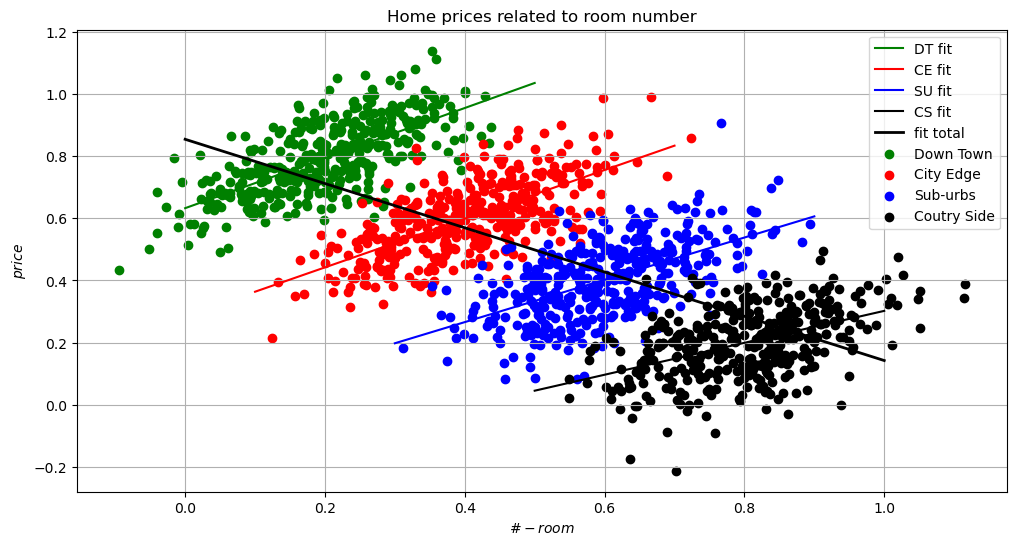

In [60]:
plt.figure(figsize=(12,6))
plt.scatter(x.room[x.cat=='DT'], x.price[x.cat=='DT'],c='green',label='Down Town')
plt.scatter(x.room[x.cat=='CE'], x.price[x.cat=='CE'],c='red',label='City Edge')
plt.scatter(x.room[x.cat=='SU'], x.price[x.cat=='SU'],c='blue',label='Sub-urbs')
plt.scatter(x.room[x.cat=='CS'], x.price[x.cat=='CS'],c='black',label='Coutry Side')
plt.plot(linex1,liney1,c='green', label='DT fit')
plt.plot(linex2,liney2,c='red', label='CE fit')
plt.plot(linex3,liney3,c='blue', label='SU fit')
plt.plot(linex4,liney4,c='black', label='CS fit')
plt.plot(linext, lineyt, c='black', linewidth=2.0, label = 'fit total')
plt.xlabel('$\#-room$')
plt.ylabel('$price$')
plt.grid(True)
plt.legend()
plt.title('Home prices related to room number')
plt.show()

#### Calculate the statistical moments of the two time-series

In [11]:
moment1 = np.zeros(5, dtype=float)
moment2 = np.zeros(5, dtype=float)

for i in range(moment1.size):
    moment1[i] = stats.moment(sig1,moment=i)
for i in range(moment2.size):
    moment2[i] = stats.moment(sig2,moment=i)

print('\nThe first 5 statistical moments of the 2-level-PDF are (starting from zero): ')
print(moment1)
print('\nThe first 5 statistical moments of the Normal-dist PDF are (starting from zero): ')
print(moment2)


The first 5 statistical moments of the 2-level-PDF are (starting from zero): 
[1.         0.         0.02242803 0.005878   0.00956031]

The first 5 statistical moments of the Normal-dist PDF are (starting from zero): 
[1.         0.         0.32602192 0.46357137 1.00856396]


#### Present the statistical moments in more suitable representation

In [12]:
meanf2 = np.mean(sig1)
stdevf2 = np.std(sig1)
varf2 = np.var(sig1)
kurtf2 = stats.kurtosis(sig1)
skewf2 = stats.skew(sig1)

meanfg = np.mean(sig2)
stdevfg = np.std(sig2)
varfg = np.var(sig2)
kurtfg = stats.kurtosis(sig2)
skewfg = stats.skew(sig2)

print('values for the 2-level-PDF: mean = {:.3f}, var = {:.3f},stdev = {:.3f}, skewness = {:.3f}, kurtosis = {:.3f}\n'.format(meanf2,varf2,stdevf2,skewf2,kurtf2))
print('values for the Normal-PDF : mean = {:.3f}, var = {:.3f},stdev = {:.3f}, skewness = {:.3f}, kurtosis = {:.3f}\n'.format(meanfg,varfg,stdevfg,skewfg,kurtfg))



values for the 2-level-PDF: mean = 0.004, var = 0.022,stdev = 0.150, skewness = 1.750, kurtosis = 16.006

values for the Normal-PDF : mean = 0.340, var = 0.326,stdev = 0.571, skewness = 2.490, kurtosis = 6.489

